In [4]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting, image
from nilearn.masking import compute_brain_mask
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os
from PIL import Image


=== NIfTI File Analysis ===

1. Basic Information:
Data Dimensions: (64, 80, 33, 176)
Voxel Size: (3.0, 2.9999943, 4.000003, 2.0)
Data Type: float32
Header Information:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  4  64  80  33 176   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         3.         2.9999943  4.000003   2.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 32
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_c


2. Statistical Information:
Mean: 17.911366692252148
Std: 29.585039598254937
Min: 0.0006184953381307423
Max: 139.40213012695312
Median: 2.187366485595703
Non-zero voxels: 29736960


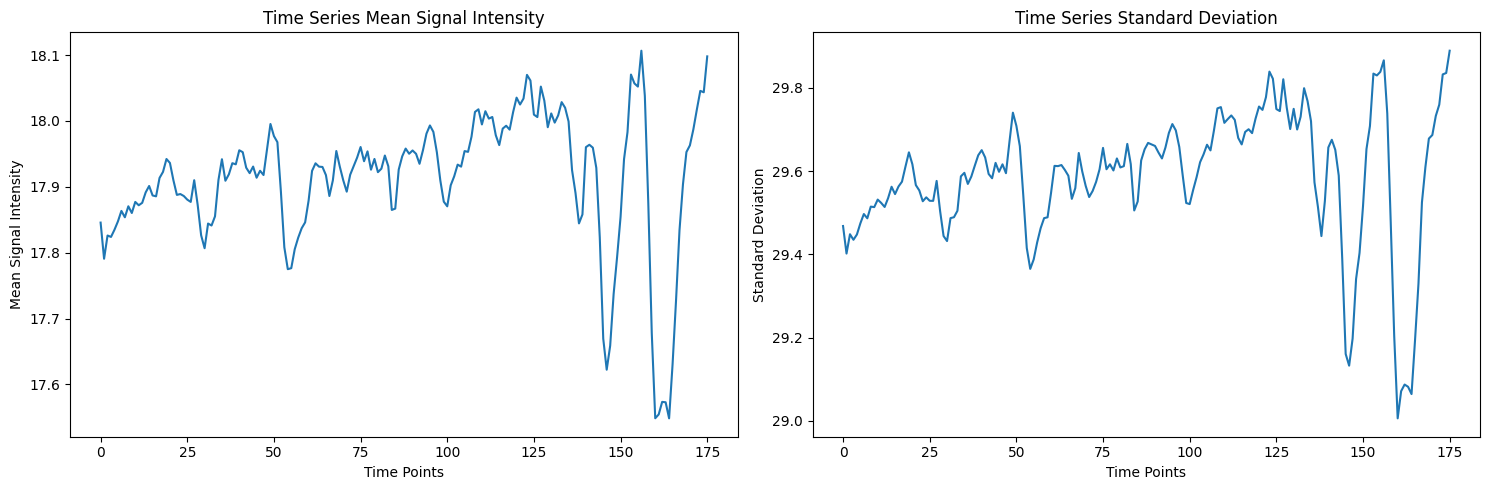

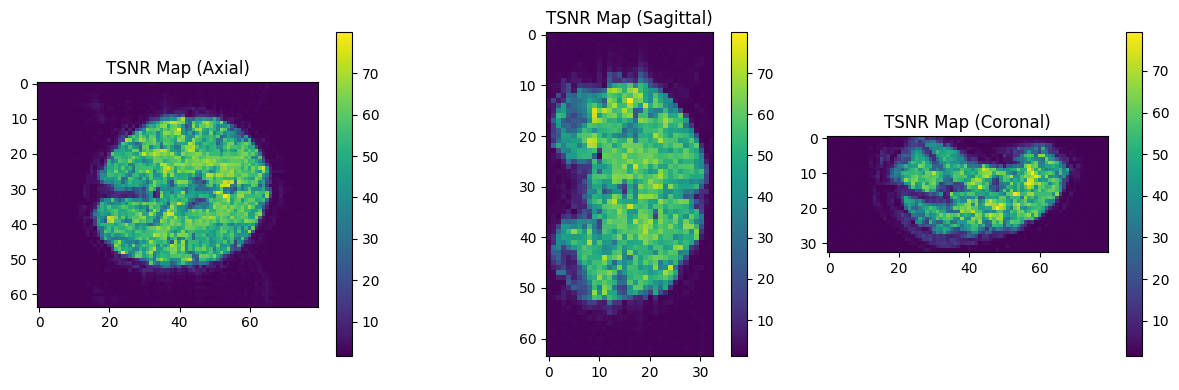

Saved: /root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images/square_0_0.png
Saved: /root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images/square_0_1.png
Saved: /root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images/square_0_2.png
Saved: /root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images/square_1_0.png
Saved: /root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images/square_1_1.png
Saved: /root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images/square_1_2.png
Saved: /root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images/square_2_0.png
Saved: /root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images/square_2_1.png
Saved: /root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images/square_2_2.png


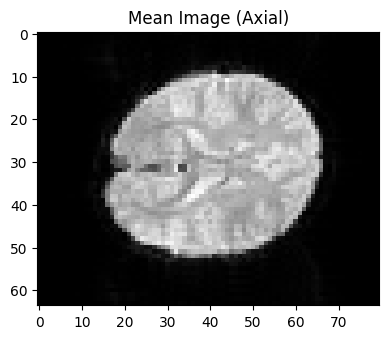

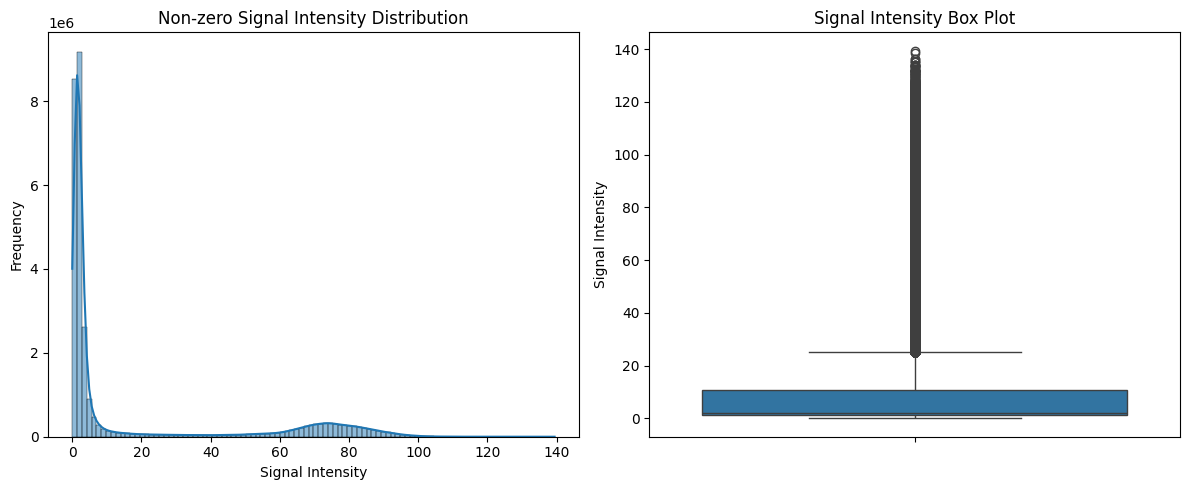

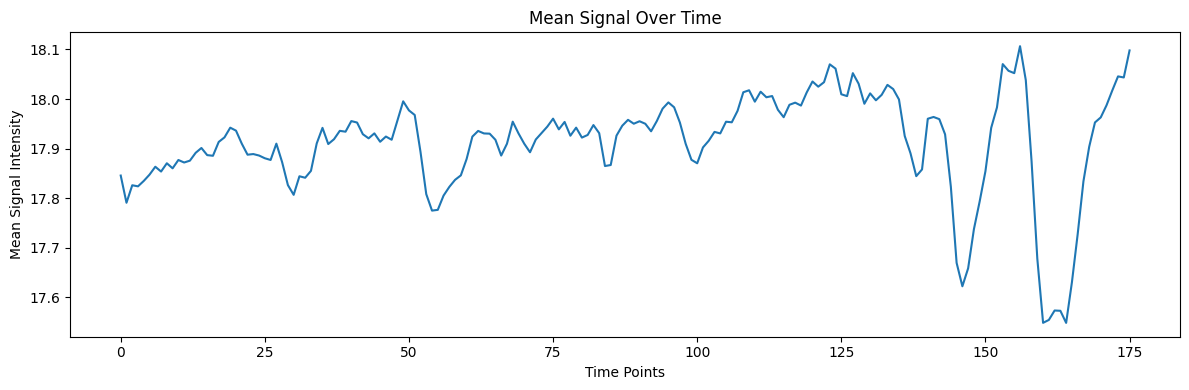

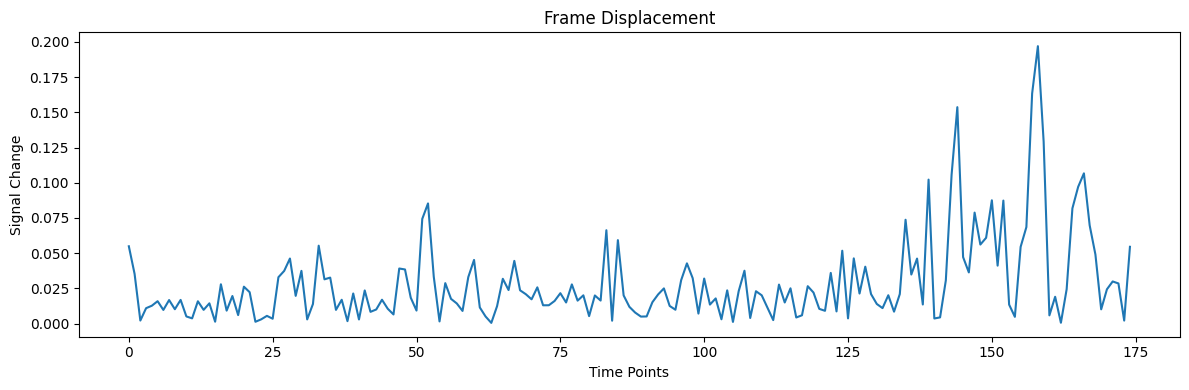

TypeError: cannot unpack non-iterable NoneType object

In [5]:


def analyze_nifti_file(nifti_path):
    """Detailed analysis of NIfTI format fMRI data"""
    # Load NIfTI file
    print(f"\n=== NIfTI File Analysis ===")
    img = nib.load(nifti_path)
    data = img.get_fdata()
    
    # 1. Basic Information
    print("\n1. Basic Information:")
    print(f"Data Dimensions: {data.shape}")
    print(f"Voxel Size: {img.header.get_zooms()}")
    print(f"Data Type: {img.get_data_dtype()}")
    print(f"Header Information:\n{img.header}")
    
    # 2. Basic Statistical Analysis
    stats_info = {
        "Mean": np.mean(data),
        "Std": np.std(data),
        "Min": np.min(data),
        "Max": np.max(data),
        "Median": np.median(data),
        "Non-zero voxels": np.count_nonzero(data)
    }
    print("\n2. Statistical Information:")
    for key, value in stats_info.items():
        print(f"{key}: {value}")
    
    # 3. Time Series Analysis
    if len(data.shape) == 4:  # Ensure 4D data
        temporal_mean = np.mean(data, axis=(0,1,2))
        temporal_std = np.std(data, axis=(0,1,2))
        
        # Plot time series mean and std
        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.plot(temporal_mean)
        plt.title('Time Series Mean Signal Intensity')
        plt.xlabel('Time Points')
        plt.ylabel('Mean Signal Intensity')
        
        plt.subplot(122)
        plt.plot(temporal_std)
        plt.title('Time Series Standard Deviation')
        plt.xlabel('Time Points')
        plt.ylabel('Standard Deviation')
        plt.tight_layout()
        plt.show()
        
        # Calculate TSNR (Temporal Signal-to-Noise Ratio)
        tsnr = np.mean(data, axis=-1) / np.std(data, axis=-1)
        tsnr[np.isnan(tsnr)] = 0
        tsnr[np.isinf(tsnr)] = 0
        
        # Display TSNR maps
        plt.figure(figsize=(12, 4))
        plt.subplot(131)
        plt.imshow(tsnr[:, :, tsnr.shape[2]//2], cmap='viridis')
        plt.title('TSNR Map (Axial)')
        plt.colorbar()
        
        plt.subplot(132)
        plt.imshow(tsnr[:, tsnr.shape[1]//2, :], cmap='viridis')
        plt.title('TSNR Map (Sagittal)')
        plt.colorbar()
        
        plt.subplot(133)
        plt.imshow(tsnr[tsnr.shape[0]//2, :, :].T, cmap='viridis')
        plt.title('TSNR Map (Coronal)')
        plt.colorbar()
        plt.tight_layout()
        plt.show()
    
    # 4. Spatial Analysis
    # Calculate mean image
    mean_img = np.mean(data, axis=-1) if len(data.shape) == 4 else data
    
    # Display center slices in three directions
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    axial_slice = mean_img[:, :, mean_img.shape[2]//2]
    plt.imshow(axial_slice, cmap='gray')
    save_axial_squares(axial_slice)

    plt.title('Mean Image (Axial)')
    # plt.colorbar()
    
    # plt.subplot(132)
    # plt.imshow(mean_img[:, mean_img.shape[1]//2, :], cmap='gray')
    # plt.title('Mean Image (Sagittal)')
    # plt.colorbar()
    
    # plt.subplot(133)
    # plt.imshow(mean_img[mean_img.shape[0]//2, :, :].T, cmap='gray')
    # plt.title('Mean Image (Coronal)')
    # plt.colorbar()
    # plt.tight_layout()
    plt.show()
    
    # 5. Signal Distribution Analysis
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    sns.histplot(data=data[data != 0].flatten(), bins=100, kde=True)
    plt.title('Non-zero Signal Intensity Distribution')
    plt.xlabel('Signal Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(122)
    sns.boxplot(y=data[data != 0].flatten())
    plt.title('Signal Intensity Box Plot')
    plt.ylabel('Signal Intensity')
    plt.tight_layout()
    plt.show()
    
    # 6. Time Point Analysis
    if len(data.shape) == 4:
        # Calculate mean signal for each time point
        time_series = np.mean(data, axis=(0, 1, 2))
        
        # Plot the time-series data
        plt.figure(figsize=(12, 4))
        plt.plot(time_series)
        plt.title('Mean Signal Over Time')
        plt.xlabel('Time Points')
        plt.ylabel('Mean Signal Intensity')
        plt.tight_layout()
        plt.show()
        
        # 7. Motion Analysis (Frame Displacement)
        frame_displacement = np.abs(np.diff(time_series))
        plt.figure(figsize=(12, 4))
        plt.plot(frame_displacement)
        plt.title('Frame Displacement')
        plt.xlabel('Time Points')
        plt.ylabel('Signal Change')
        plt.tight_layout()
        plt.show()

def save_axial_squares(mean_img, output_dir="./9images"):
    """
    Save the axial mean image into 9 equal squares.
    :param mean_img: The mean image array (2D axial slice).
    :param output_dir: Directory to save the images.
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Get dimensions of the image
    height, width = mean_img.shape
    
    # Calculate square dimensions
    step_h = height // 3
    step_w = width // 3
    
    for row in range(3):
        for col in range(3):
            # Calculate start and end indices for the square
            start_h, end_h = row * step_h, (row + 1) * step_h
            start_w, end_w = col * step_w, (col + 1) * step_w
            
            # Extract the square
            square = mean_img[start_h:end_h, start_w:end_w]
            
            # Convert to an image
            img = Image.fromarray((square / np.max(square) * 255).astype(np.uint8))
            
            # Save the image
            img_path = os.path.join("/root/autodl-tmp/CNNLSTM/Project/fMRI/ljhtest/images",f"square_{row}_{col}.png")
            img.save(img_path)
            print(f"Saved: {img_path}")

# Execute analysis
nifti_path = "/root/autodl-tmp/CNNLSTM/Project/Data/sub-0010001_ses-1_task-rest_run-1_bold.nii.gz"
stats_info, header = analyze_nifti_file(nifti_path)

# 分析所有的原始nii数据

In [6]:
def load_and_preprocess_data(file_path):
    """
    加载并预处理单个nii.gz文件
    """
    # 加载nii文件
    img = nib.load(file_path)
    data = img.get_fdata()
    
    # 基本信息
    print(f"数据形状: {data.shape}")
    print(f"数据类型: {data.dtype}")
    
    return img, data

数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 80, 33, 176)
数据类型: float64
数据形状: (64, 8

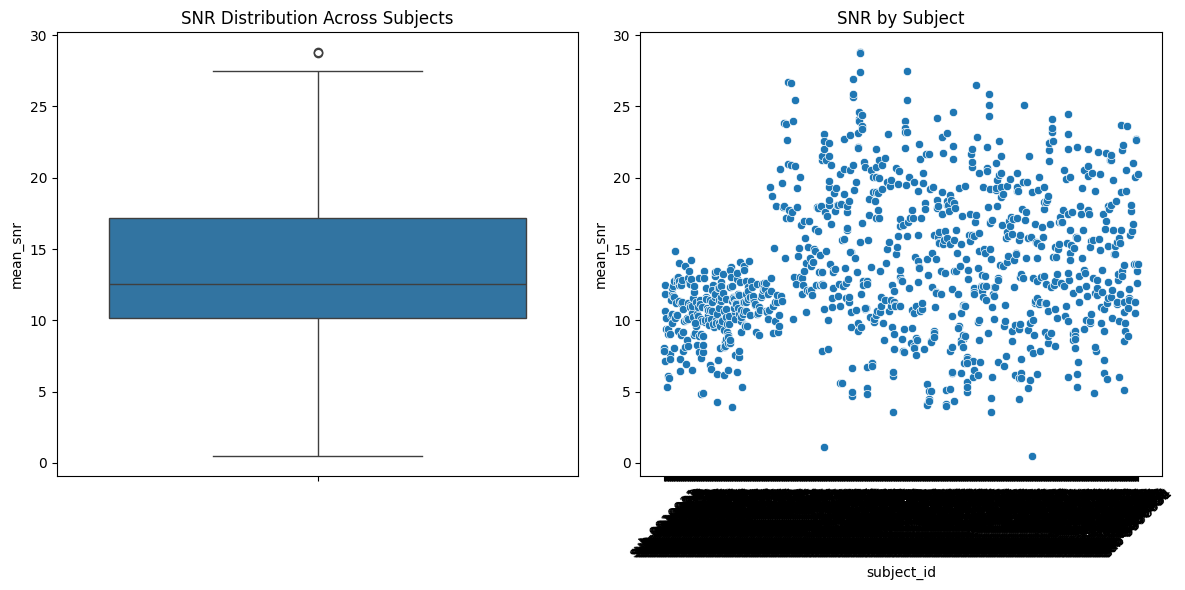

分析完成！结果已保存到adhd_analysis_results.csv


In [9]:

def analyze_single_subject(file_path):
    """
    分析单个受试者的数据
    """
    img, data = load_and_preprocess_data(file_path)
    
    # 计算基本统计量
    mean_signal = np.mean(data, axis=-1)  # 时间维度平均
    std_signal = np.std(data, axis=-1)    # 时间维度标准差
    
    # 计算时间序列的SNR
    snr = mean_signal / (std_signal + 1e-6)
    
    return {
        'mean': mean_signal,
        'std': std_signal,
        'snr': snr,
        'raw_data': data
    }

def temporal_analysis(data):
    """
    时间序列分析
    """
    # 提取时间序列
    time_series = data.mean(axis=(0,1,2))  # 空间平均
    
    # 计算自相关
    autocorr = np.correlate(time_series, time_series, mode='full')
    autocorr = autocorr[len(autocorr)//2:]
    
    return time_series, autocorr

def group_analysis(file_list):
    """
    组水平分析
    """
    results = []
    for file_path in file_list:
        subject_id = os.path.basename(file_path).split('_')[0]
        analysis = analyze_single_subject(file_path)
        
        # 提取关键指标
        mean_snr = np.mean(analysis['snr'])
        std_snr = np.std(analysis['snr'])
        
        results.append({
            'subject_id': subject_id,
            'mean_snr': mean_snr,
            'std_snr': std_snr
        })
    
    return pd.DataFrame(results)

def plot_results(results_df):
    """
    绘制结果图表
    """
    plt.figure(figsize=(12, 6))
    
    # SNR分布图
    plt.subplot(121)
    sns.boxplot(data=results_df, y='mean_snr')
    plt.title('SNR Distribution Across Subjects')
    
    # 受试者间比较
    plt.subplot(122)
    sns.scatterplot(data=results_df, x='subject_id', y='mean_snr')
    plt.xticks(rotation=45)
    plt.title('SNR by Subject')
    
    plt.tight_layout()
    plt.show()

def main():
    # 设置数据目录
    data_dir = "/root/autodl-tmp/CNNLSTM/Project/Data"
    
    # 获取所有task-rest数据文件
    file_list = [f for f in os.listdir(data_dir) if f.endswith('bold.nii.gz')]
    file_paths = [os.path.join(data_dir, f) for f in file_list]
    
    # 进行组分析
    results_df = group_analysis(file_paths)
    
    # 绘制结果
    plot_results(results_df)
    
    # 保存结果
    results_df.to_csv('adhd_analysis_results.csv', index=False)
    
    print("分析完成！结果已保存到adhd_analysis_results.csv")

if __name__ == "__main__":
    main()

数据形状: (64, 80, 33, 176)
数据类型: float64


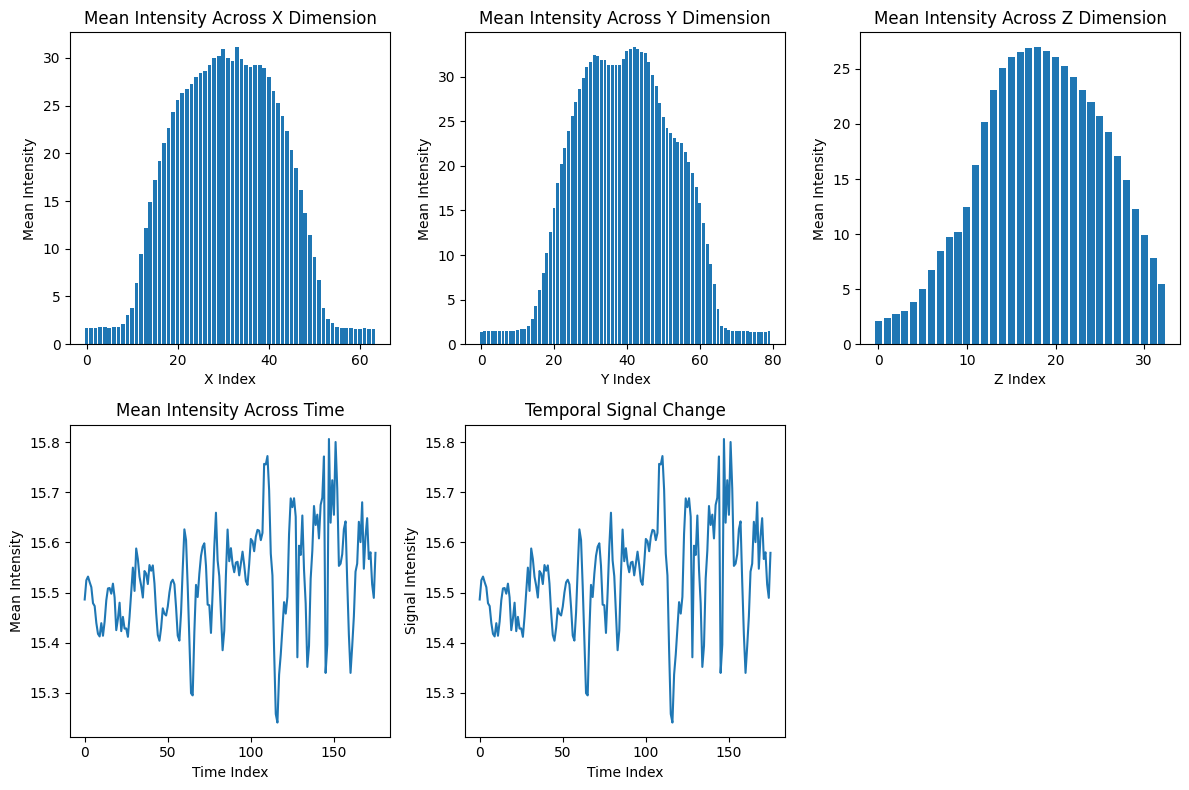

In [7]:

def plot_dimension_analysis(data):  
    """  
    绘制每个维度的均值直方图，以及每个维度值的折线图  
    """  
    # 计算每个维度的均值  
    mean_x = data.mean(axis=(1, 2, 3))  # X维度均值  
    mean_y = data.mean(axis=(0, 2, 3))  # Y维度均值  
    mean_z = data.mean(axis=(0, 1, 3))  # Z维度均值  
    mean_time = data.mean(axis=(0, 1, 2))  # 时间维度均值  

    # 绘制直方图  
    plt.figure(figsize=(12, 8))  
    
    plt.subplot(231)  
    plt.bar(range(len(mean_x)), mean_x)  
    plt.title("Mean Intensity Across X Dimension")  
    plt.xlabel("X Index")  
    plt.ylabel("Mean Intensity")  
    
    plt.subplot(232)  
    plt.bar(range(len(mean_y)), mean_y)  
    plt.title("Mean Intensity Across Y Dimension")  
    plt.xlabel("Y Index")  
    plt.ylabel("Mean Intensity")  
    
    plt.subplot(233)  
    plt.bar(range(len(mean_z)), mean_z)  
    plt.title("Mean Intensity Across Z Dimension")  
    plt.xlabel("Z Index")  
    plt.ylabel("Mean Intensity")  
    
    # 绘制时间维度的均值变化折线图  
    plt.subplot(234)  
    plt.plot(mean_time)  
    plt.title("Mean Intensity Across Time")  
    plt.xlabel("Time Index")  
    plt.ylabel("Mean Intensity")  
    
    # 绘制时间序列变化折线图  
    time_series = data.mean(axis=(0, 1, 2))  # 空间平均的时间序列  
    plt.subplot(235)  
    plt.plot(time_series)  
    plt.title("Temporal Signal Change")  
    plt.xlabel("Time Index")  
    plt.ylabel("Signal Intensity")  
    
    plt.tight_layout()  
    plt.show()  

def main():  
    # 设置数据目录  
    data_dir = "/root/autodl-tmp/CNNLSTM/Project/Data"  
    
    # 获取所有task-rest数据文件  
    file_list = [f for f in os.listdir(data_dir) if f.endswith('bold.nii.gz')]  
    file_paths = [os.path.join(data_dir, f) for f in file_list]  
    
    # 加载第一个文件进行分析  
    if file_paths:  
        img, data = load_and_preprocess_data(file_paths[0])  
        
        # 绘制维度直方图和折线图  
        plot_dimension_analysis(data)  
    else:  
        print("未找到符合条件的文件！")  


main()

Mean Dimensions: X=64.0, Y=70.796875, Z=33.9462890625, Time=170.3271484375


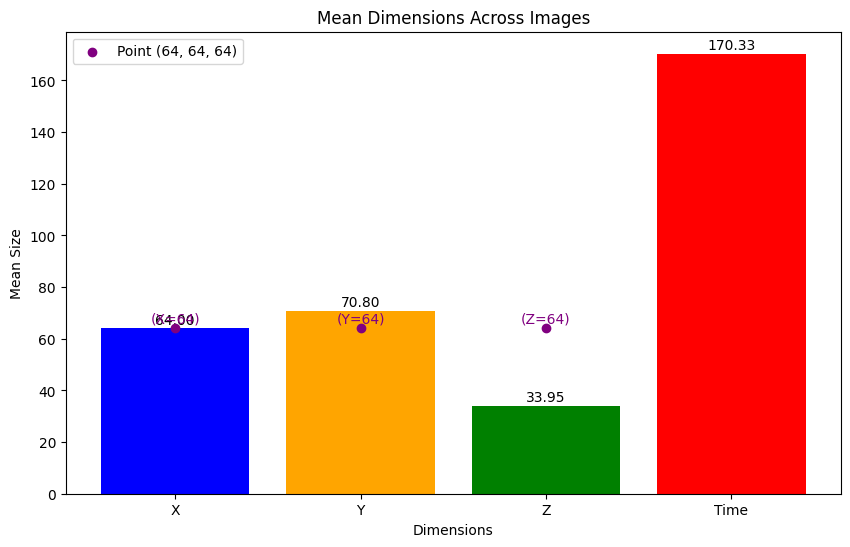

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt


def compute_dimension_means(file_paths):  
    """  
    计算所有图片的维度均值  
    """  
    # 初始化累加变量  
    sum_x = 0  
    sum_y = 0  
    sum_z = 0  
    sum_time = 0  
    image_count = 0  

    for file_path in file_paths:  
        # 加载单个nii文件  
        img = nib.load(file_path)  
        data = img.get_fdata()  

        # 获取当前图片的维度  
        x, y, z, time_length = data.shape  

        # 累加每张图片的维度  
        sum_x += x  
        sum_y += y  
        sum_z += z  
        sum_time += time_length  

        # 增加图片计数  
        image_count += 1  

    # 计算均值  
    mean_x = sum_x / image_count  
    mean_y = sum_y / image_count  
    mean_z = sum_z / image_count  
    mean_time = sum_time / image_count  

    return mean_x, mean_y, mean_z, mean_time  


def plot_dimension_means(mean_x, mean_y, mean_z, mean_time):  
    """  
    绘制维度均值的直方图  
    """  
    # 创建画布  
    plt.figure(figsize=(10, 6))  

    # 横轴标签和均值数据  
    dimensions = ['X', 'Y', 'Z', 'Time']  
    means = [mean_x, mean_y, mean_z, mean_time]  

    # 绘制直方图  
    bars = plt.bar(dimensions, means, color=['blue', 'orange', 'green', 'red'])  

    # 添加均值值显示  
    for bar, mean in zip(bars, means):  
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                 f'{mean:.2f}', ha='center', va='bottom')  

    # 标注点 (64, 64, 64)  
    plt.scatter(['X', 'Y', 'Z'], [64, 64, 64], color='purple', label='Point (64, 64, 64)', zorder=5)
    for dim, value in zip(['X', 'Y', 'Z'], [64, 64, 64]):
        plt.text(dim, value + 2, f'({dim}=64)', ha='center', color='purple')

    # 图表标题和标签  
    plt.title("Mean Dimensions Across Images")  
    plt.xlabel("Dimensions")  
    plt.ylabel("Mean Size")  
    plt.legend()  
    plt.show()  


def main():  
    # 设置数据目录  
    data_dir = "/root/autodl-tmp/CNNLSTM/Project/Data"  
    
    # 获取所有task-rest数据文件  
    file_list = [f for f in os.listdir(data_dir) if f.endswith('bold.nii.gz')]  
    file_paths = [os.path.join(data_dir, f) for f in file_list]  
    
    # 检查是否有文件  
    if not file_paths:  
        print("未找到符合条件的文件！")  
        return  

    # 计算所有图片的维度均值  
    mean_x, mean_y, mean_z, mean_time = compute_dimension_means(file_paths)  

    # 打印均值  
    print(f"Mean Dimensions: X={mean_x}, Y={mean_y}, Z={mean_z}, Time={mean_time}")  

    # 绘制维度均值的直方图  
    plot_dimension_means(mean_x, mean_y, mean_z, mean_time)  


if __name__ == "__main__":  
    main()

X Values: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 6

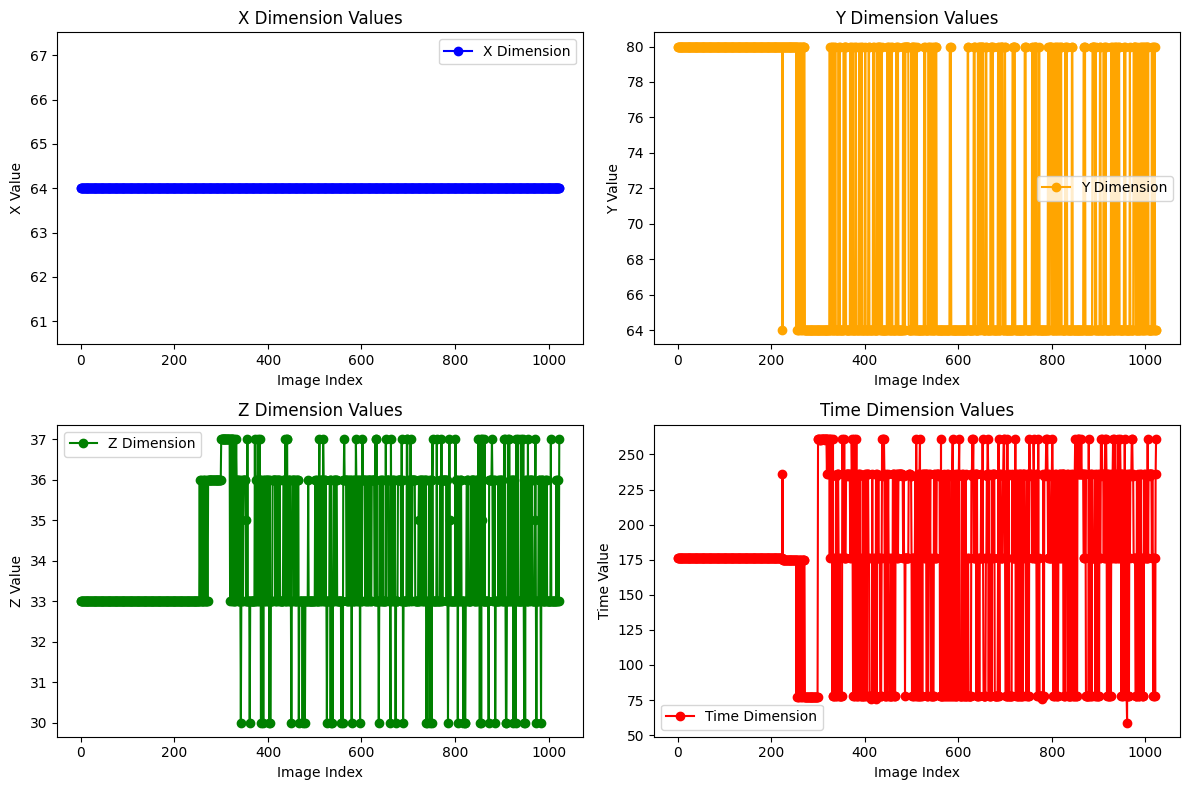

In [14]:
def compute_dimensions(file_paths):  
    """  
    计算所有图片的维度值  
    """  
    x_values = []  
    y_values = []  
    z_values = []  
    time_values = []  

    for file_path in file_paths:  
        # 加载单个nii文件  
        img = nib.load(file_path)  
        data = img.get_fdata()  

        # 获取当前图片的维度  
        x, y, z, time_length = data.shape  

        # 记录每张图片的维度  
        x_values.append(x)  
        y_values.append(y)  
        z_values.append(z)  
        time_values.append(time_length)  

    return x_values, y_values, z_values, time_values  


def plot_dimension_values(x_values, y_values, z_values, time_values):  
    """  
    绘制每个维度的值的折线图  
    """  
    # 创建画布  
    plt.figure(figsize=(12, 8))  

    # 绘制 X 维度的折线图  
    plt.subplot(221)  
    plt.plot(range(len(x_values)), x_values, marker='o', color='blue', label='X Dimension')  
    plt.title("X Dimension Values")  
    plt.xlabel("Image Index")  
    plt.ylabel("X Value")  
    plt.legend()  

    # 绘制 Y 维度的折线图  
    plt.subplot(222)  
    plt.plot(range(len(y_values)), y_values, marker='o', color='orange', label='Y Dimension')  
    plt.title("Y Dimension Values")  
    plt.xlabel("Image Index")  
    plt.ylabel("Y Value")  
    plt.legend()  

    # 绘制 Z 维度的折线图  
    plt.subplot(223)  
    plt.plot(range(len(z_values)), z_values, marker='o', color='green', label='Z Dimension')  
    plt.title("Z Dimension Values")  
    plt.xlabel("Image Index")  
    plt.ylabel("Z Value")  
    plt.legend()  

    # 绘制 Time 维度的折线图  
    plt.subplot(224)  
    plt.plot(range(len(time_values)), time_values, marker='o', color='red', label='Time Dimension')  
    plt.title("Time Dimension Values")  
    plt.xlabel("Image Index")  
    plt.ylabel("Time Value")  
    plt.legend()  

    # 调整布局  
    plt.tight_layout()  
    plt.show()  


def main():  
    # 设置数据目录  
    data_dir = "/root/autodl-tmp/CNNLSTM/Project/Data"  
    
    # 获取所有task-rest数据文件  
    file_list = [f for f in os.listdir(data_dir) if f.endswith('bold.nii.gz')]  
    file_paths = [os.path.join(data_dir, f) for f in file_list]  
    
    # 检查是否有文件  
    if not file_paths:  
        print("未找到符合条件的文件！")  
        return  

    # 获取所有图片的维度值  
    x_values, y_values, z_values, time_values = compute_dimensions(file_paths)  

    # 打印维度值  
    print(f"X Values: {x_values}")  
    print(f"Y Values: {y_values}")  
    print(f"Z Values: {z_values}")  
    print(f"Time Values: {time_values}")  

    # 绘制维度值的折线图  
    plot_dimension_values(x_values, y_values, z_values, time_values)  


if __name__ == "__main__":  
    main()